<a href="https://colab.research.google.com/github/shabirahmed5465/LLM-coding/blob/main/code_roberta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive')

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 req

In [ ]:
from datasets import load_dataset

dataset = load_dataset("damerajee/IMDB-sentiment-reviews")
print(dataset)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment'],
        num_rows: 50000
    })
})


In [ ]:
labels = set(dataset['train']['sentiment'])
print("Unique labels:", labels)
print(len(labels))

Unique labels: {'negative', 'positive'}
2


In [ ]:
sample = dataset['train'][0]
print(sample)

{'review': "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is du

In [ ]:
print(dataset['train'].column_names)

['review', 'sentiment']


In [ ]:
from sklearn.model_selection import train_test_split
from datasets import load_dataset,Dataset, DatasetDict
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df = dataset['train'].to_pandas()
df.reset_index(drop=True, inplace=True)

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)

train_df['sentiment'] = label_encoder.fit_transform(train_df['sentiment'])
val_df['sentiment'] = label_encoder.transform(val_df['sentiment'])

In [ ]:

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset
})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment'],
        num_rows: 40000
    })
    validation: Dataset({
        features: ['review', 'sentiment'],
        num_rows: 10000
    })
})

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
# Load the tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['review'], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.rename_column("sentiment", "labels")
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "labels"])


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer, TrainingArguments
from datasets import load_metric


training_args = TrainingArguments(
    output_dir='./roberta_results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=p.predictions.argmax(axis=-1), references=p.label_ids)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-13-c97569a5a399>:15: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics
)

trainer.train()
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

Epoch,Training Loss,Validation Loss,Accuracy
1,0.228200,0.257467,0.938200
2,0.145400,0.222699,0.950900


Epoch,Training Loss,Validation Loss,Accuracy
1,0.228200,0.257467,0.938200
2,0.145400,0.222699,0.950900
3,0.055600,0.270911,0.954000


Evaluation results: {'eval_loss': 0.2709108591079712, 'eval_accuracy': 0.954, 'eval_runtime': 175.1496, 'eval_samples_per_second': 57.094, 'eval_steps_per_second': 7.137, 'epoch': 3.0}


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


predictions = trainer.predict(tokenized_datasets['validation'])
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

true_labels = np.array(true_labels)


conf_matrix = confusion_matrix(true_labels, pred_labels, labels=[0, 1])
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(true_labels, pred_labels, target_names=['negative', 'positive'])
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[4739  222]
 [ 238 4801]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.95      0.96      0.95      4961
    positive       0.96      0.95      0.95      5039

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



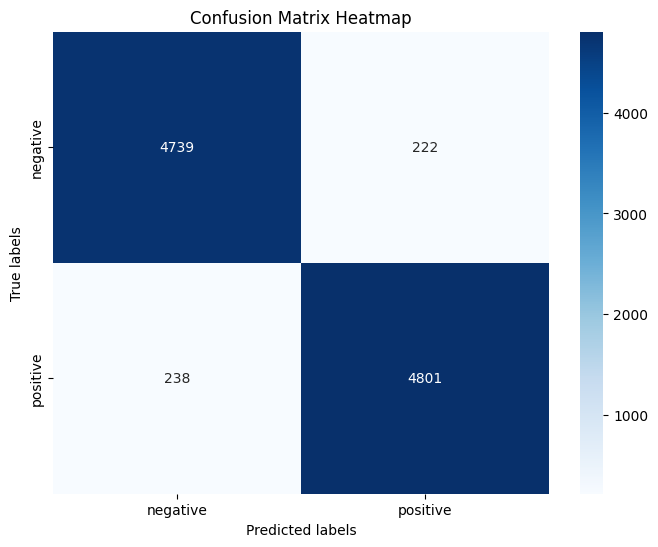

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()